In [5]:
#lets start the implimentairing the project the project is just nothing but the costmer segmtation it is the siple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers ,models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [7]:
data=pd.read_csv("Mall_Customers.csv")

In [8]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [9]:
X=data[["Age"	,"Annual Income (k$)" ,"Spending Score (1-100)"]].values

In [12]:
st=StandardScaler()
X_scaled=st.fit_transform(X)

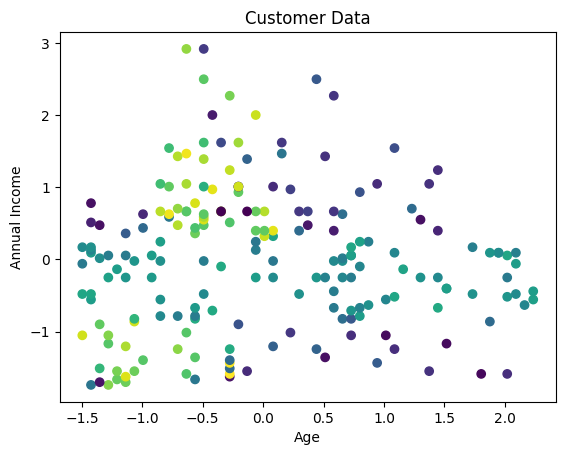

In [13]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=X_scaled[:, 2], cmap='viridis')
plt.title("Customer Data")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 1.2423 - val_loss: 1.2389
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.2492 - val_loss: 1.2385
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.2516 - val_loss: 1.2381
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1.2513 - val_loss: 1.2377
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.2622 - val_loss: 1.2373
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.2371 - val_loss: 1.2369
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.2402 - val_loss: 1.2364
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.2502 - val_loss: 1.2360
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.2371 - val_loss: 1.2356
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.2336 - val_loss: 1.2352
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.2518 - val_loss: 1.2349
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.2091 - val_loss: 1.2345


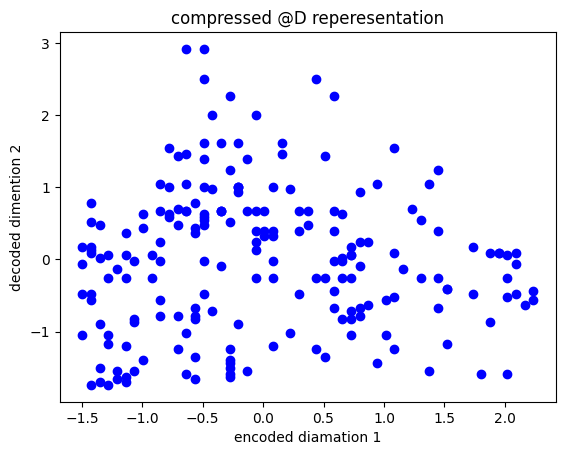

In [18]:
input_dim=X_scaled.shape[1]
input_layer=layers.Input(shape=(input_dim,))

encoded=layers.Dense(units=2 , activation="relu")(input_layer)
decoded=layers.Dense(input_dim , activation="sigmoid")(encoded)

autoencoder=models.Model(input_layer ,decoded)
autoencoder.compile( optimizer="adam",loss="mean_squared_error")
autoencoder.fit(X_scaled, X_scaled  , epochs=50  ,batch_size=128  ,shuffle=True , validation_split=(0.2))

encoder=models.Model(input_layer , encoded)
encoded_data=encoder.predict(X_scaled)

plt.scatter(X_scaled[:,0] , X_scaled[:,1] , c="blue")
plt.title("compressed @D reperesentation")
plt.xlabel("encoded diamation 1")
plt.ylabel("decoded dimention 2")
plt.show()



In [23]:
# Group by 'Cluster' and calculate the mean for numeric columns only
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
cluster_summary = data.groupby('Cluster')[numeric_data.columns].mean()

# Display the summary
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         72.666667  60.370370           49.592593               54.148148   
1        104.312500  44.312500           61.000000               36.406250   
2         20.090909  52.272727           24.363636               11.000000   
3        119.859649  30.368421           69.236842               60.421053   
4         57.187500  42.812500           41.250000               25.250000   

         cluster  Cluster  
Cluster                    
0            0.0      0.0  
1            1.0      1.0  
2            2.0      2.0  
3            3.0      3.0  
4            4.0      4.0  


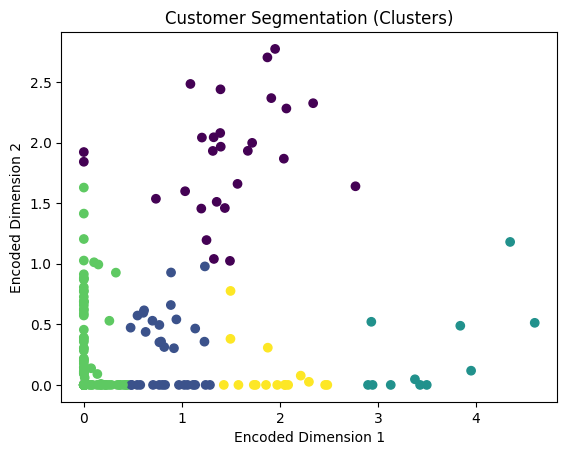

In [24]:
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Customer Segmentation (Clusters)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

# GAN

In [26]:
#lets start builing the gan
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [ ]:
(x_train  , _)(_ ,_)=mnist.load_data()
x_train =x_train.astype('float32')/255.0
x_train=np.expand_dims(x_train , axis=-1)
z_dim = 100


In [ ]:
def build_generator():
    model = Sequential()
    model.add(layers.Dense(256, input_dim=z_dim))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(28 * 28 * 1, activation='tanh'))  # Output layer: 28x28 image
    model.add(layers.Reshape((28, 28, 1)))  # Reshape the output to 28x28x1 image
    return model

def build_discriminator():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Flatten input image
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability (real or fake)
    return model

def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False  # Freeze the discriminator when training the GAN
    model.add(discriminator)
    return model


genretor=build_genretor()
discrimnetor=build_discriminetor()
discriminetor.compile(optimizer="adam" , loss="binary_corss_entropy" , metircs=["accuracy"])

gan=build_gan(genretor , discriminetor)
gan.compile(optimizer='adam' ,loss="binary_cross_entropy")

epochs = 1000
batch_size = 64
half_batch = batch_size // 2


# Training the GAN
for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images = X_train[idx]
    fake_images = generator.predict(np.random.randn(half_batch, z_dim))

    real_labels = np.ones((half_batch, 1))
    fake_labels = np.zeros((half_batch, 1))

    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.randn(batch_size, z_dim)
    g_loss = gan.train_on_batch(noise, real_labels)

    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")

    # Save generated images at intervals
    if epoch % 1000 == 0:
        plot_generated_images(epoch, generator)

def plot_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.randn(examples, z_dim)
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()










# transformer